# PL01. EDA del Conjunto de Datos _Pingüinos de Palmer_
## Práctica realizada por Víctor Vega Sobral
### Campus A Coruña

__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

En el Campus Virtual encontrará un archivo CSV con el conjunto de datos _Pingüinos de Palmer_: `palmer_penguins.csv`. Este conjunto de datos contiene información sobre pingüinos de varias especies diferentes. En este ejercicio, se le pide que realice un análisis exploratorio de los datos (EDA) sobre este conjunto de datos dado. Considere que usted es un científico de datos al que le han proporcionado este conjunto de datos para que plantee diferentes casos de uso y desarrolle modelos predictivos interesantes para un equipo de investigación de biología marina.

Siéntase con libertad para realizar cualquier tipo de análisis que considere relevante. A continuación, se proporcionan algunas sugerencias de análisis que podría realizar:

1. Estrucutra de los datos. Dimensiones del conjunto de datos, tipos de datos, etc.
2. Estadísticas descriptivas. Resumen estadístico de las variables numéricas.
3. Distribución de las variables. Histogramas, diagramas de caja, etc.
4. Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.
5. Análisis de valores perdidos. ¿Cómo manejaría los valores perdidos?
6. Análisis de valores atípicos. ¿Cómo manejaría los valores atípicos?
7. Análisis de la variable objetivo, de haberla. ¿Cómo es la distribución de la variable objetivo?

Para llevar a cabo este análisis, probablemente necesitará preparar algunas visualizaciones de datos. Considere que sus análisis tendrán que ser presentados al equipo, compuesto por personal no técnico, por lo que deberá ser capaz de explicar sus resultados de manera clara y concisa. Algunas librerías de Python que podrían serle útiles para este análisis son `pandas`, `matplotlib`, `seaborn`, etc.


In [84]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

## 1. Carga del conjunto de datos

In [85]:
CSV_FILE = "palmer_penguins.csv"

df = pd.read_csv(CSV_FILE)



# 1. Estrucutra de los datos. Dimensiones del conjunto de datos, tipos de datos, etc.


In [86]:
# Dimensiones del conjunto de datos
# Número de filas
num_filas = df.shape[0]
print(f"El numero de filas es de {num_filas}")

# Número de columnas 
num_columnas = df.shape[1]
print(f"El numero de filas es de {num_columnas}")


# Tipos de datos
print("\n ******TIPOS DE DATOS****** \n")
print(df.dtypes)


El numero de filas es de 344
El numero de filas es de 9

 ******TIPOS DE DATOS****** 

id                     int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


# 2. Estadísticas descriptivas: Resumen Estadístico de las Variables Numéricas

In [87]:
print("Resumen estadístico de las variables numéricas: \n", df.describe())

# Seleccionar las columnas con variables numéricas

df_numerico = df.select_dtypes(include = [np.number])

media = df_numerico.mean()
mediana = df_numerico.median()
val_min = df_numerico.min()
val_max = df_numerico.max()
des_estandar= df_numerico.std()
conteo= df_numerico.count()


mensaje = f"""A continuación se muestran los datos más relevantes:
\n 
Media: 
{media}
\n
Mediana: 
{mediana}
\n
Valor mínimo: 
{val_min}
\n
Valor máximo: 
{val_max}
\n
Desviación estándar: 
{des_estandar}
\n
Conteo de valores no nulos: 
{conteo}
"""

print(mensaje)

Resumen estadístico de las variables numéricas: 
                id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   171.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      0.000000       32.100000      13.100000         172.000000   
25%     85.750000       39.225000      15.600000         190.000000   
50%    171.500000       44.450000      17.300000         197.000000   
75%    257.250000       48.500000      18.700000         213.000000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000  
A co

# 2. Análisis de las variables categóricas

Análisis de las columnas categóricas.

In [88]:
df["species"].value_counts()
df["sex"].value_counts()
df["island"].value_counts()


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# 3. Distribución de las variables. Histogramas, diagramas de caja, etc.

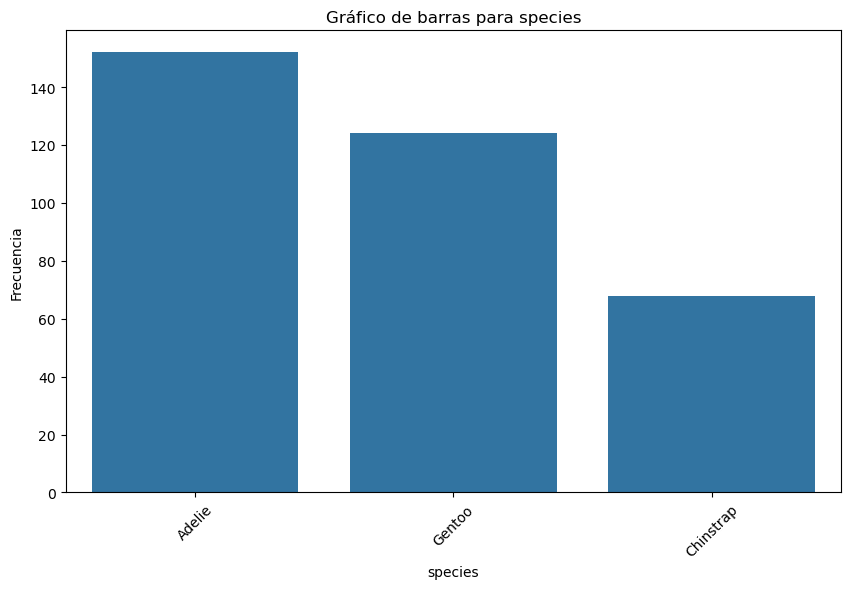

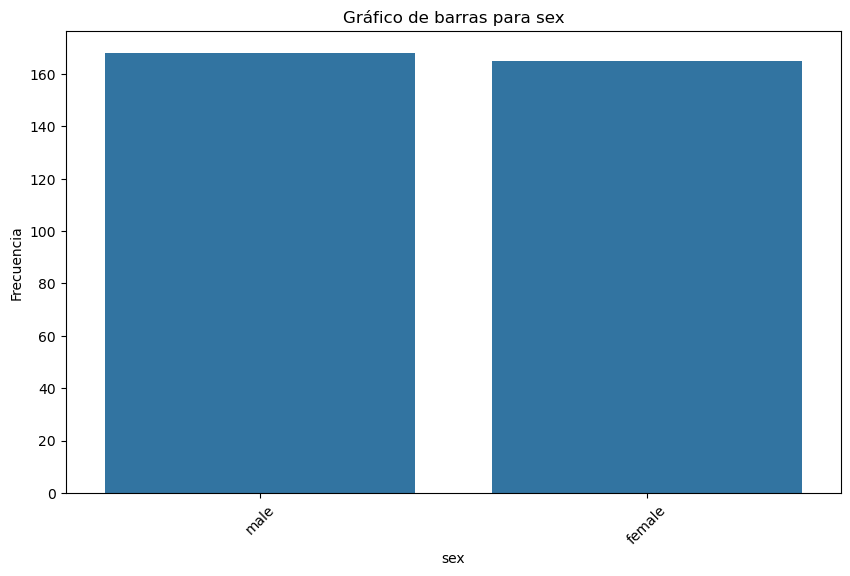

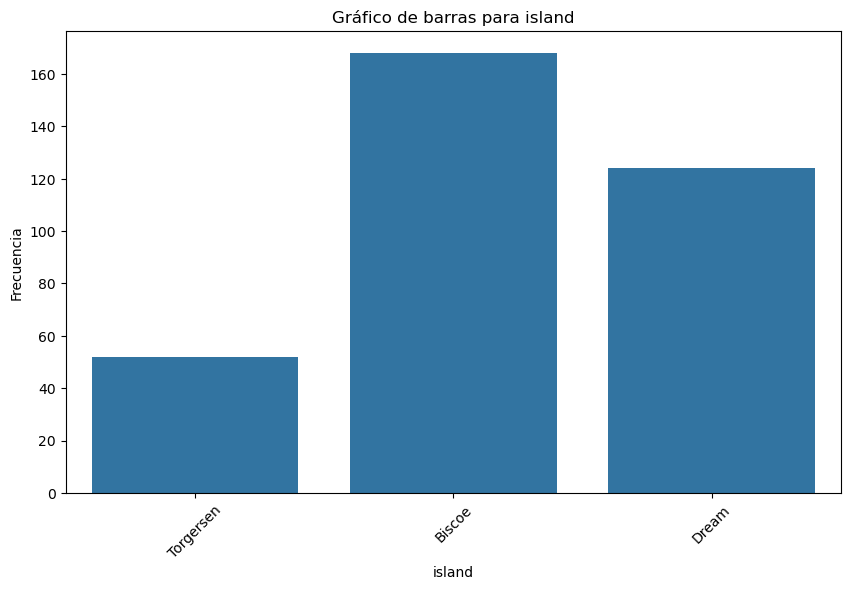

In [89]:
# Mostrar un gráfico de barras sobre cada una de las variables categóricas

categoricas = ["species", "sex", "island"]

for columna in categoricas:
    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=columna)
    plt.title(f'Gráfico de barras para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45) # Rota los datos del eje x para mayor legibilidad
    plt.show()
    
   

# 4. Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.

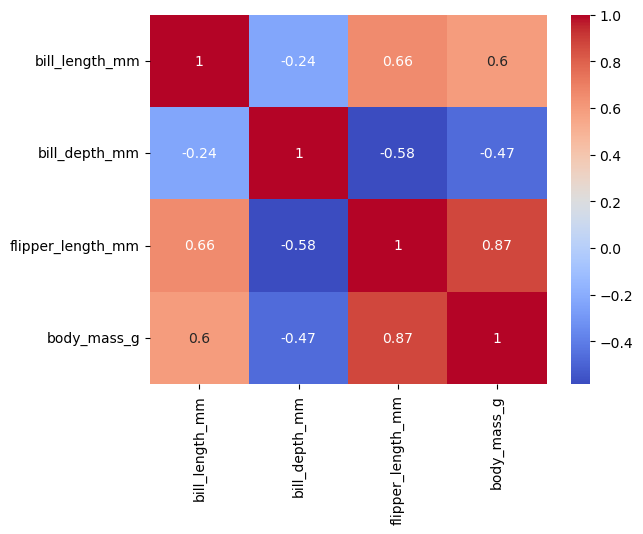

In [90]:
import plotly.express as px

# Correlaciones entre variables 
cols_numericas = [
    "bill_length_mm", 
    "bill_depth_mm",
    "flipper_length_mm",  
    "body_mass_g",
]




for col in cols_numericas:
    fig = px.violin(
        df, 
        y = col, 
        color = "species",
        box=True, points= "all",
        title = col,
        labels={
            col:col
        }
    )
    fig.show()


corr_matrix = df[cols_numericas].corr()
sns.heatmap(
    corr_matrix,
    annot=True,cmap='coolwarm'
)
plt.show()

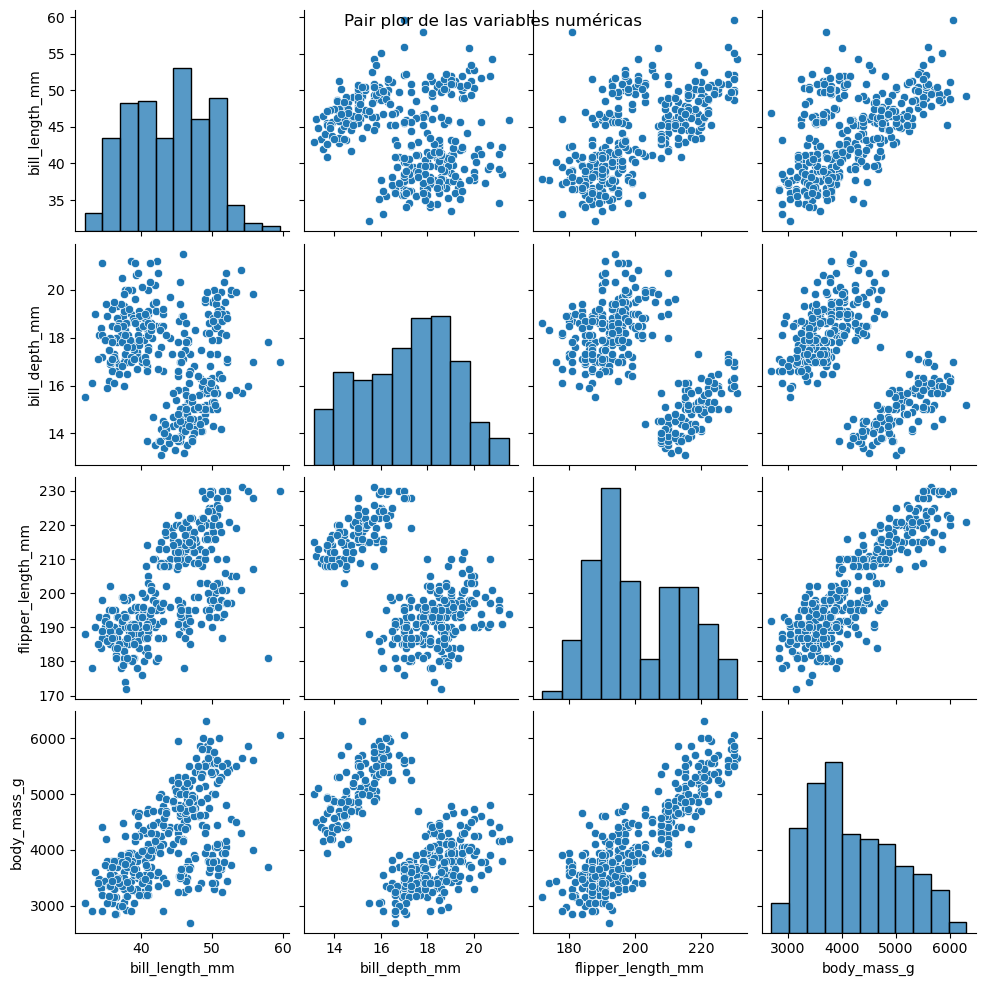

In [91]:
sns.pairplot(df[cols_numericas])
plt.suptitle("Pair plor de las variables numéricas")
plt.show()

## Distribución de los datos por años


In [92]:
year_counts = df['year'].value_counts().reset_index()
year_counts_columns = ["year", "count"]

fig = px.pie(
    year_counts,
    names = 'year', values = 'count',
    title= "Distribución de los datos por años",
    color = 'year',
)

fig.show()

# 5. Análisis de valores perdidos. ¿Cómo manejaría los valores perdidos?


In [93]:
# Contamos el numero de valores nulos
df.isnull().sum()

# A continuación eliminamos aquellas filas que se encuentren vacías
df_filtrado = df.dropna()
#print(df_filtrado)



In [94]:
# También podemos rellenar los valores perdidos con un valor específico con el método fillna()
# Por ejemplo, podemos introducir el valor "desconocido"

cols_numericas = [
    "bill_length_mm", 
    "bill_depth_mm",
    "flipper_length_mm",  
    "body_mass_g",
]

# Como añadir un string a las columnas numéricas arrojaría un error, creamos una copia del dataframe
# para que se pueda observar que esto se puede hacer
df_desconocido = df.copy()
for col in cols_numericas:
    df_desconocido[col] = df_desconocido[col].fillna('desconocido')


# Mejor que lo anterior es rellenar los valores perdidos en el DataFrame original con la media de cada columna
for col in cols_numericas:
    df[col] = df[col].fillna(df[col].mean())


# 6. Análisis de valores atípicos. ¿Cómo manejaría los valores atípicos?

## Visualización de los valores atípicos.
Uno de los métodos más útiles para ver si se encuentran valores atípicos en nuestros datos es mediante los gráficos de caja.

<Figure size 1000x600 with 0 Axes>

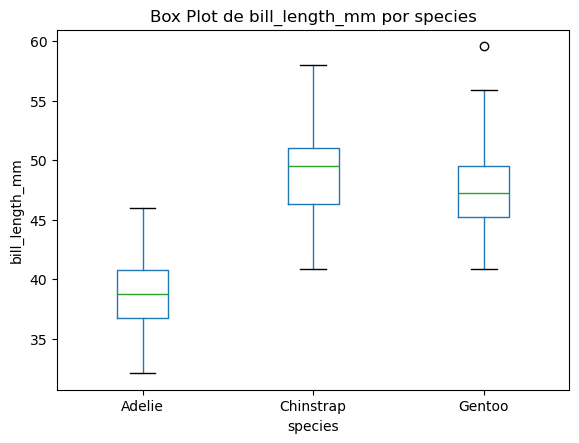

<Figure size 1000x600 with 0 Axes>

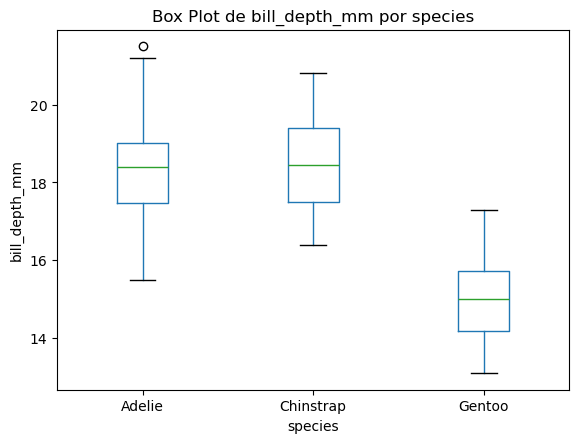

<Figure size 1000x600 with 0 Axes>

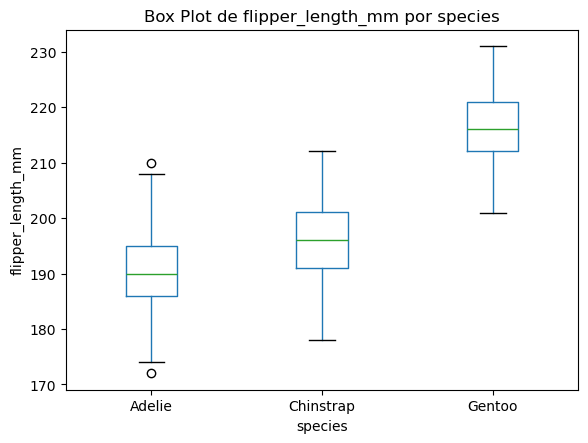

<Figure size 1000x600 with 0 Axes>

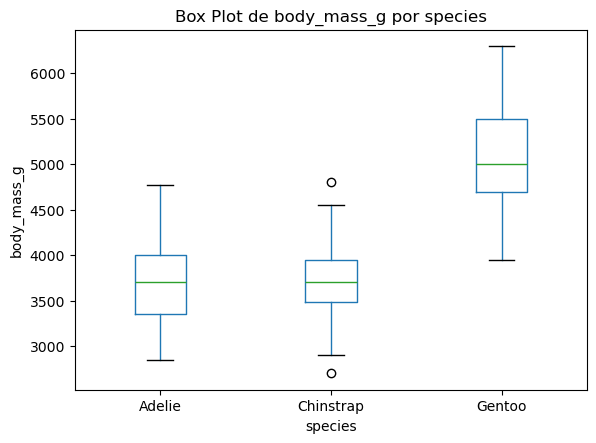

In [95]:
for col in cols_numericas:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, by='species', grid=False)
    plt.title(f'Box Plot de {col} por species')
    plt.suptitle('')  # Eliminar el título automático de pandas
    plt.xlabel('species')
    plt.ylabel(col)
    plt.show()

## Cálculo de los valores atípicos
### Método del Rango Intercuartílico (IQR)

Los valores atípicos se definen como aquellos que están por debajo de:

\[ Q1 - 1.5 * IQR \]

o por encima de:

\[ Q3 + 1.5 * IQR \]

Donde:

- \( Q1 \) es el primer cuartil (percentil 25).
- \( Q3 \) es el tercer cuartil (percentil 75).
- \( IQR \) es el rango intercuartílico, calculado como:

\[ IQR = Q3 - Q1 \]



In [1]:
# Definir una función para calcular los valores atípicos utilizando IQR
def calcular_valores_atipicos_iqr(df, columna):
    Q1 = df[columna].quantile(0.25) # Calculamos el valor por debajo del cual caen el 25% de los datos
    Q3 = df[columna].quantile(0.75) # Valor por debajo del cual cae el 75% de los datos
    IQR = Q3 - Q1 # Calculamos el valor del rango intercuartílico
    
    # Calculo de los limites inferior y superior
    # Primer cuartil menos el índice intercuartílico multiplicado por 1.5
    lower_bound = Q1 - 1.5 * IQR
    # Tercer cuartil mas el índice intercuartílico multiplicado por 1.5
    upper_bound = Q3 + 1.5 * IQR

    valores_atipicos = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    return valores_atipicos, lower_bound, upper_bound

# Calcular los valores atípicos para todas las columnas numéricas
# Rescatamos nuestra lista
cols_numericas = [
    "bill_length_mm", 
    "bill_depth_mm",
    "flipper_length_mm",  
    "body_mass_g",
]


for columna in cols_numericas:
    valores_atipicos, lower_bound, upper_bound = calcular_valores_atipicos_iqr(df, columna)
    print(f"Valores atípicos en {columna}:")
    print(valores_atipicos)
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print("\n")

NameError: name 'df' is not defined

# 7. Análisis de la variable objetivo, de haberla. ¿Cómo es la distribución de la variable objetivo?

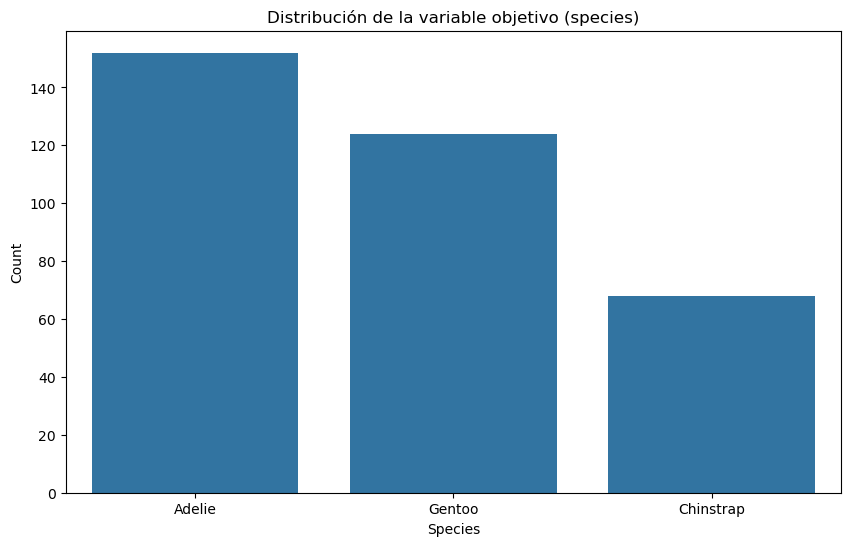

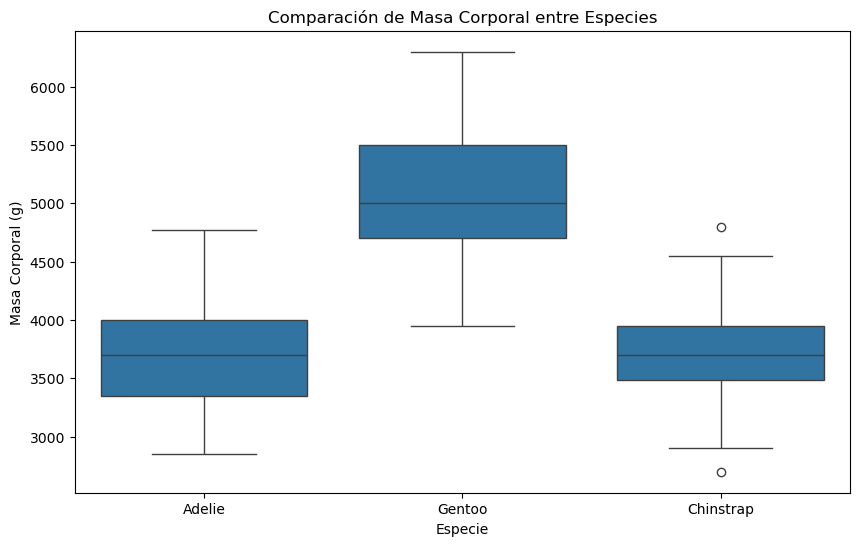

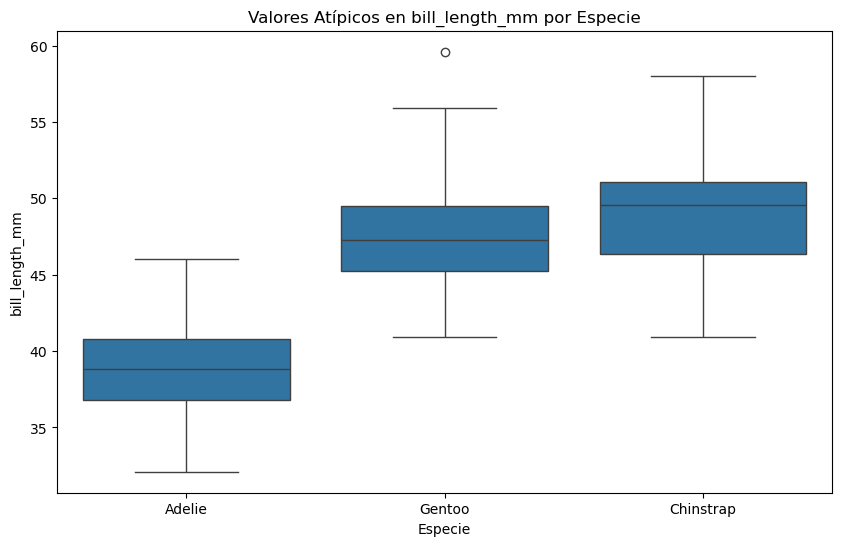

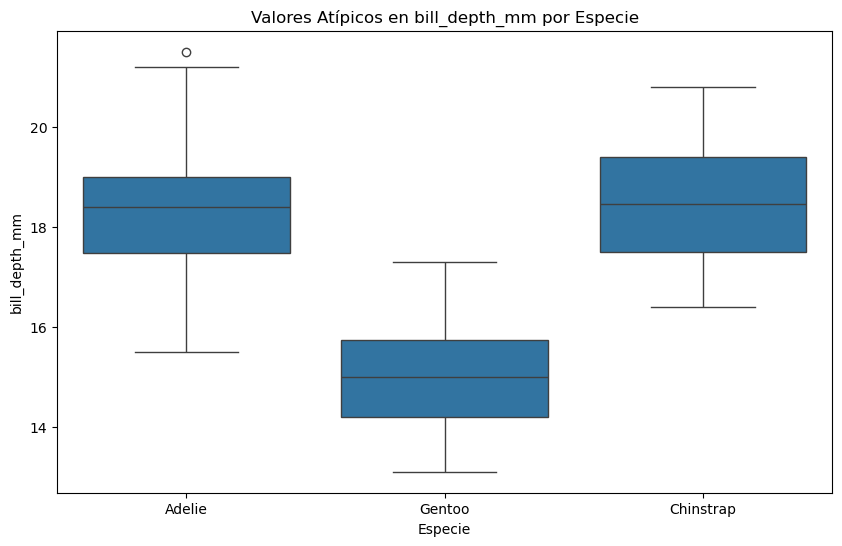

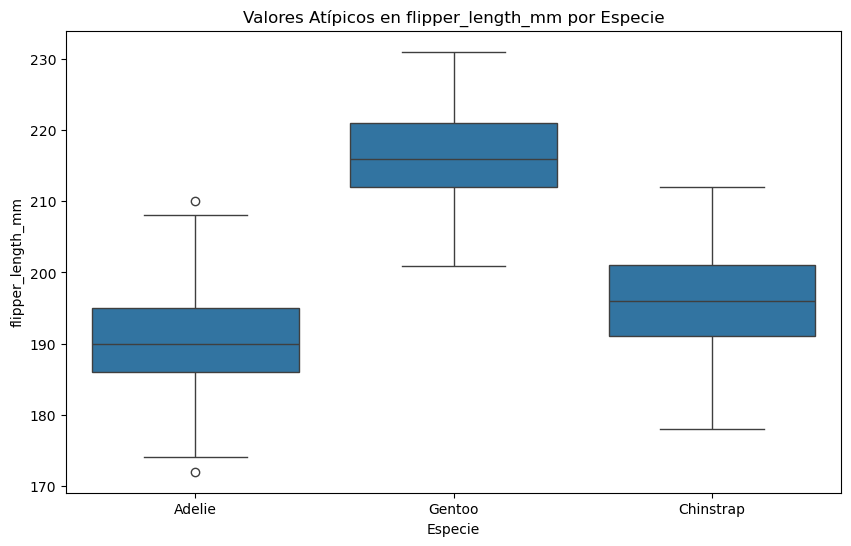

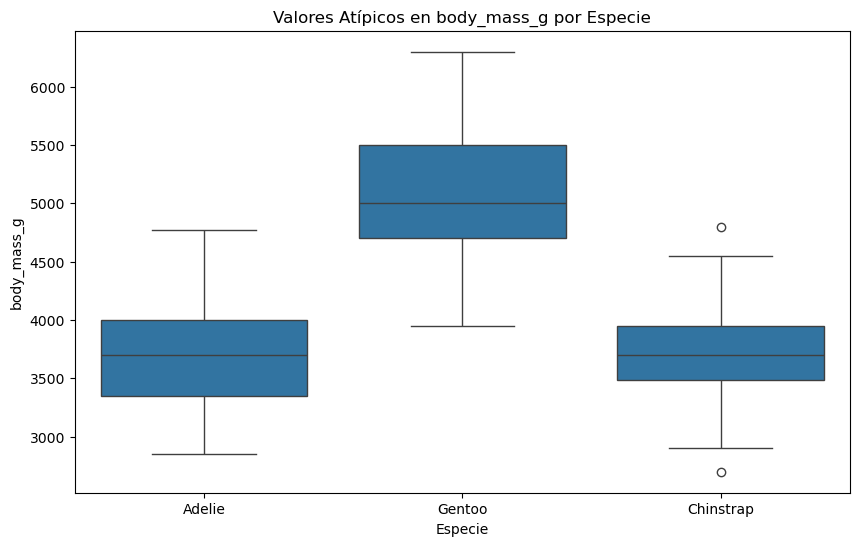

In [100]:
# Asumiendo que la variable objetivo es 'species'
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('Distribución de la variable objetivo (species)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# De esta forma, podemos ver la distribución del número de ejemplares 
# por cada especie de pingüino


# También podemos hacer una comparación de características entre especies
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Comparación de Masa Corporal entre Especies')
plt.xlabel('Especie')
plt.ylabel('Masa Corporal (g)')
plt.show()

# También podemos identiciar los valores atípicos por características de cada especie
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'Valores Atípicos en {col} por Especie')
    plt.xlabel('Especie')
    plt.ylabel(col)
    plt.show()